# Get the data

## clone the data from the authors git repo

In [1]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
#!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

### explore the structure of the repo

In [3]:
import os
os.listdir()

['pubmed-rct',
 '.DS_Store',
 'helper_functions.py',
 'Untitled.ipynb',
 'SkimLit.ipynb',
 'model.png',
 '__pycache__',
 'Tensorboard',
 '.ipynb_checkpoints']

In [4]:
os.chdir('pubmed-rct')

In [5]:
os.listdir()

['.DS_Store',
 'PubMed_20k_RCT_numbers_replaced_with_at_sign',
 'README.md',
 'PubMed_200k_RCT_numbers_replaced_with_at_sign',
 'PubMed_20k_RCT',
 '.git',
 'PubMed_200k_RCT']

In [6]:
os.chdir('PubMed_20k_RCT_numbers_replaced_with_at_sign')

In [7]:
os.listdir()

['.DS_Store', 'dev.txt', 'train.txt', 'test.txt']

#### First look at the dev dataset from 20k samples -> Start small

In [8]:
# read in all lines of the dev.txt file
with open('dev.txt') as f:
    lines = f.readlines()

In [9]:
# visualize the first ten outputs
lines[:10]

['###24290286\n',
 'BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tIt is not clear whether these patients would benefit from antifungal treatment .\n',
 'OBJECTIVE\tWe sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n',
 'METHODS\tAsthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .\n',
 'METHODS\tPrimary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .\n',
 'RESULTS\tSixty-five patients were randomized .

#### extract the labels and data from our dataset

In [10]:
labels = []
sentences = []
for line in lines:
    if "###" in line:
        continue
    elif "\t" in line:
        split = line.split('\t')
        labels.append(split[0])
        sentences.append(split[1].replace("\n", ""))
    else:
        continue

In [11]:
labels[:10],sentences[:10]

(['BACKGROUND',
  'BACKGROUND',
  'OBJECTIVE',
  'METHODS',
  'METHODS',
  'RESULTS',
  'RESULTS',
  'RESULTS',
  'RESULTS',
  'CONCLUSIONS'],
 ['IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'It is not clear whether these patients would benefit from antifungal treatment .',
  'We sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .',
  'Asthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'Primary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ month

In [12]:
len(labels), len(sentences)

(30212, 30212)

## Functionize the reading of data

In [13]:
import pandas as pd

In [14]:
def get_sentences_and_labels(path):
    '''A function that takes in a path where the data is stored as a text file and extracts the labels and sentences and returns this as a tuple'''
    if (not os.path.exists(path)):
        print('path doesnt exit')
        return;
    # read in all lines of the dev.txt file
    with open(path,'r') as f:
        lines = f.readlines()
    labels = []
    sentences = []
    line_counts = []
    max_lines = []
    for line in lines:
        if line.startswith('###'): # id line
            line_counter = 0
            continue
        elif "\t" in line:
            line_counts += [line_counter]
            line_counter += 1
            split = line.split('\t')
            labels.append(split[0])
            sentences.append(split[1].replace("\n", "").lower())
        else: # line is space
            max_line = line_counter - 1
            max_lines += [max_line for _ in range(max_line+1)]
            continue
    return pd.DataFrame({'line_number':line_counts,'max_line':max_lines,'sentences':sentences,'target':labels})

In [15]:
os.listdir()

['.DS_Store', 'dev.txt', 'train.txt', 'test.txt']

In [16]:
df_train = get_sentences_and_labels('train.txt')

In [17]:
df_val = get_sentences_and_labels('dev.txt')

In [18]:
df_test = get_sentences_and_labels('test.txt')

In [19]:
df_train.iloc[:13]

,line_number,max_line,sentences,target
0,0,11,to investigate the efficacy of @ weeks of dail...,OBJECTIVE
1,1,11,a total of @ patients with primary knee oa wer...,METHODS
2,2,11,outcome measures included pain reduction and i...,METHODS
3,3,11,pain was assessed using the visual analog pain...,METHODS
4,4,11,secondary outcome measures included the wester...,METHODS
5,5,11,"serum levels of interleukin @ ( il-@ ) , il-@ ...",METHODS
6,6,11,there was a clinically relevant reduction in t...,RESULTS
7,7,11,the mean difference between treatment arms ( @...,RESULTS
8,8,11,"further , there was a clinically relevant redu...",RESULTS
9,9,11,these differences remained significant at @ we...,RESULTS


In [20]:
len(df_train), len(df_val), len(df_test)

(180040, 30212, 30135)

### Change back to the original directory

In [21]:
os.chdir('..')

In [22]:
os.chdir('..')

In [23]:
os.listdir()

['pubmed-rct',
 '.DS_Store',
 'helper_functions.py',
 'Untitled.ipynb',
 'SkimLit.ipynb',
 'model.png',
 '__pycache__',
 'Tensorboard',
 '.ipynb_checkpoints']

### Visual data exploration

In [24]:
import matplotlib.pyplot as plt
import re

In [25]:
# function to plot the distributions of maximal lines in the df
def plot_distribution(df,naming):
    '''
    Function that plots the distribution of the df data, label is training, test or validation set
    '''
    fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
    plt.rcParams.update({'font.size': 15})
    # plot function - distribution of max lines
    df[['max_line']].value_counts().reset_index().sort_values('max_line',ascending=True).set_index('max_line').plot(kind='bar',ax=ax1,title='Distribution of max lines in %s data'%naming,legend=False)
    ax1.set_xlabel('Maximal number of lines in a Document',fontsize=17)
    ax1.set_ylabel('Number of Documents',fontsize=17)
    # plot function - distribution of labels
    df[['target']].value_counts().reset_index().sort_values('target',ascending=False).set_index('target').plot(kind='barh',ax=ax2,title='Distribution of the labels in %s data'%naming,legend=False)
    ax2.set_xlabel('Number of Documents',fontsize=17)
    ax2.set_ylabel('')
    
    # plot function - distribution of tokens per sentence
    df['tokens_per_sentence'] = [len(x) for x in df.sentences.str.split()]
    df.tokens_per_sentence.plot(kind='hist',bins=150,ax=ax3,title='Distribution of tokens per sentence')
    ax3.set_xlim([0,150])
    ax3.set_xlabel('Number of tokens per sentence',fontsize=17)
    ax3.set_ylabel('Number of occurences',fontsize=17)
    
    ax4.axis('off') # do not show this subplot axis
    fig.tight_layout(pad=1.0) # add space between the figures
    plt.show()

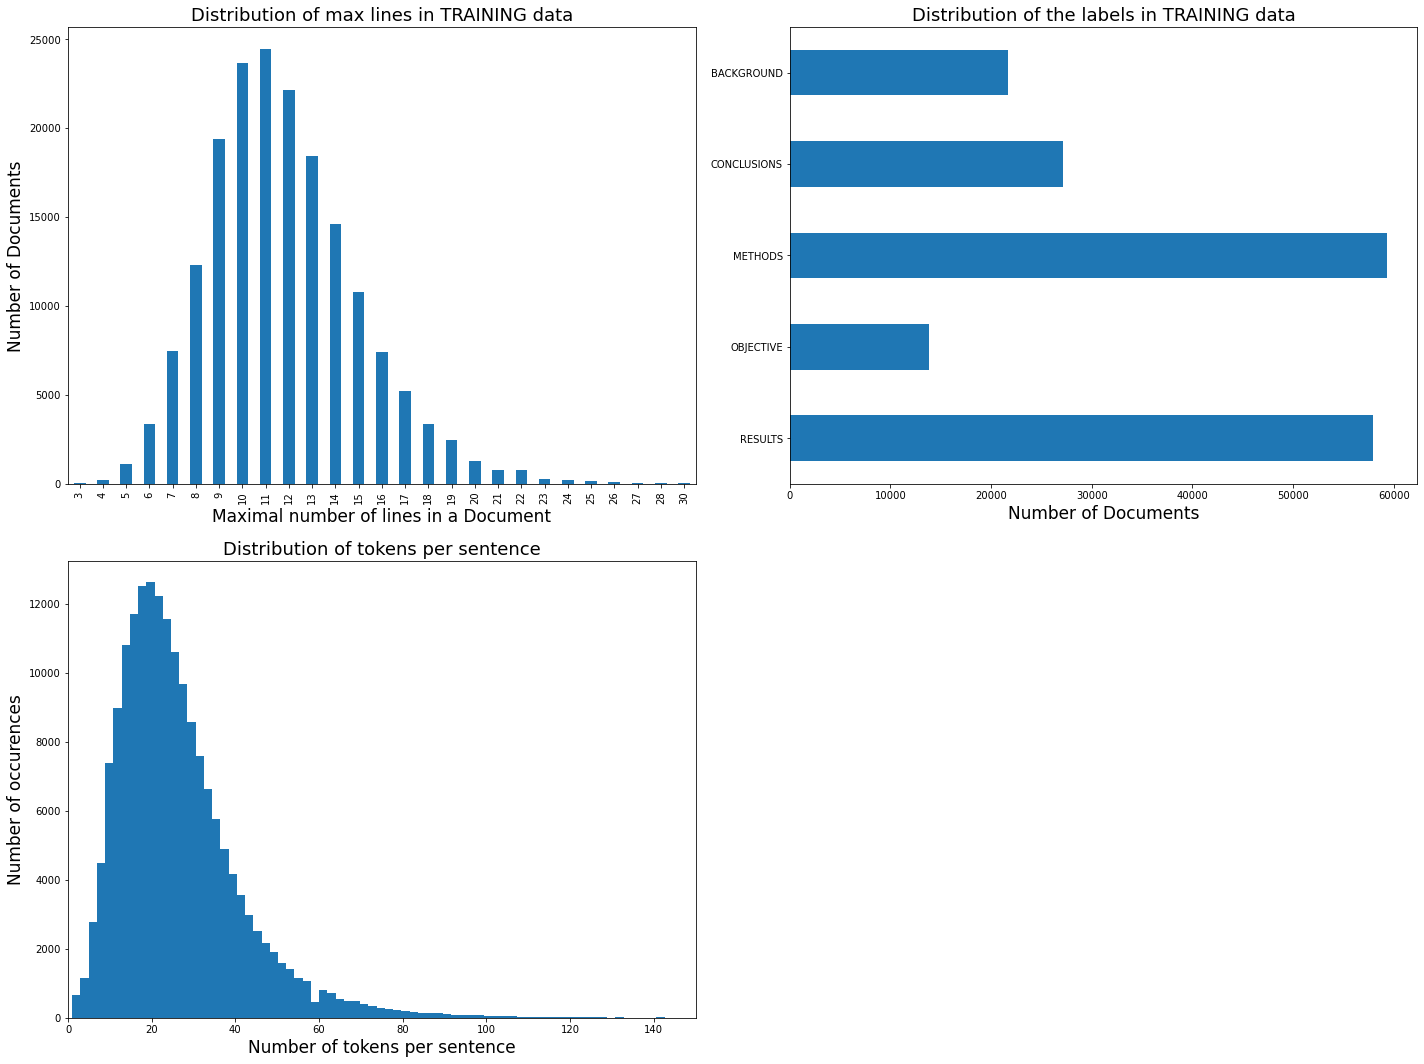

In [26]:
plot_distribution(df_train.copy(),'TRAINING')

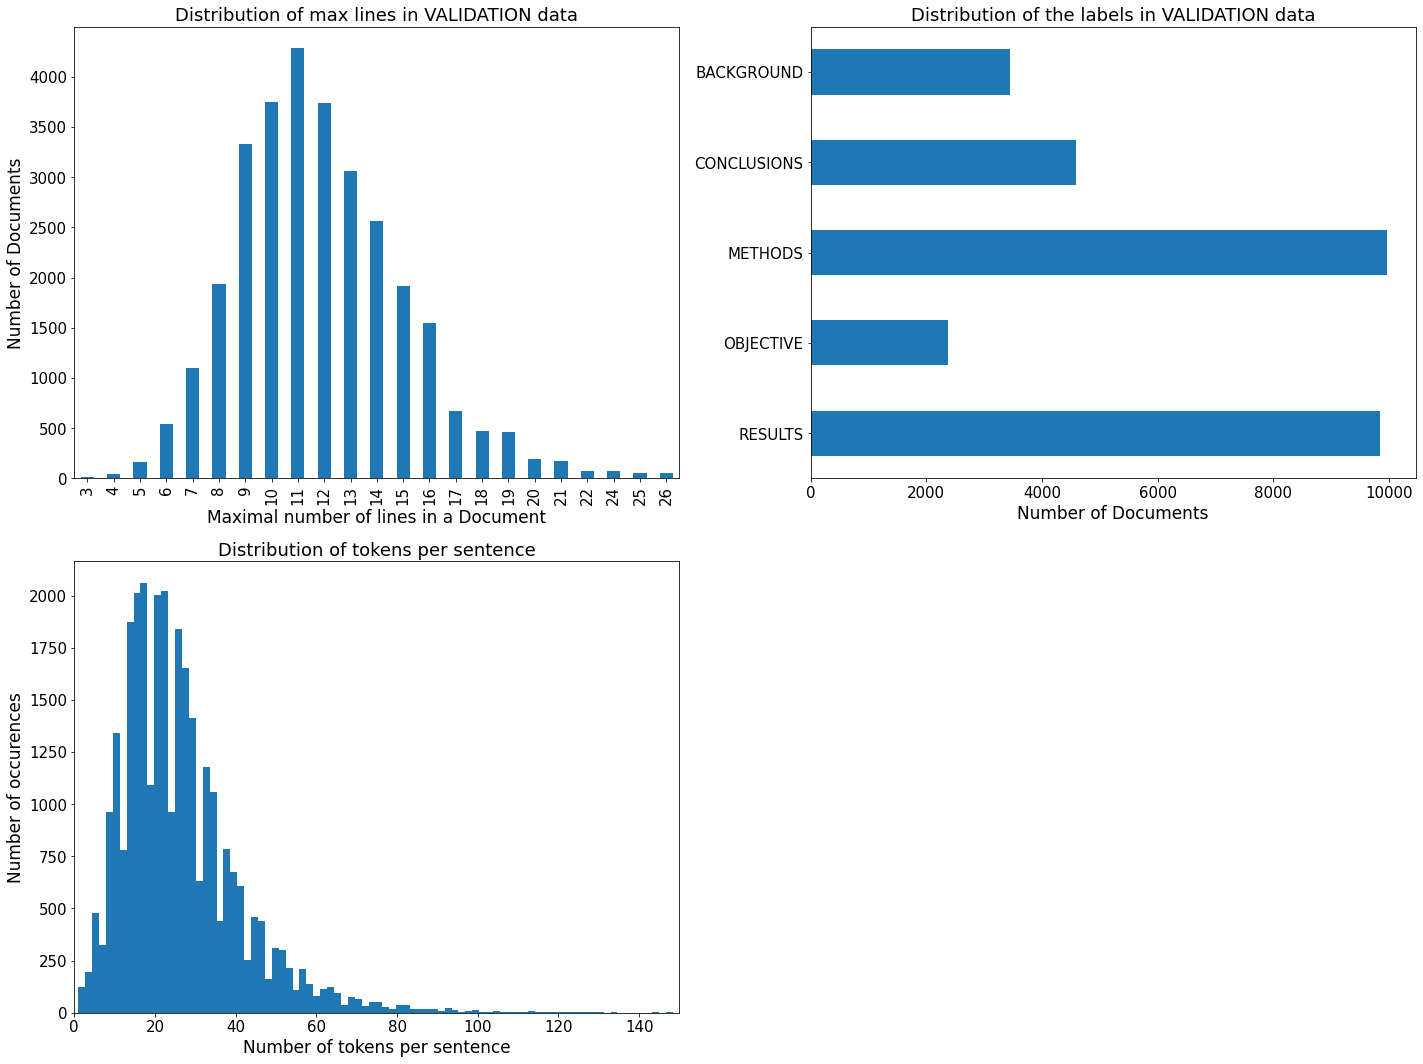

In [27]:
plot_distribution(df_val,'VALIDATION')

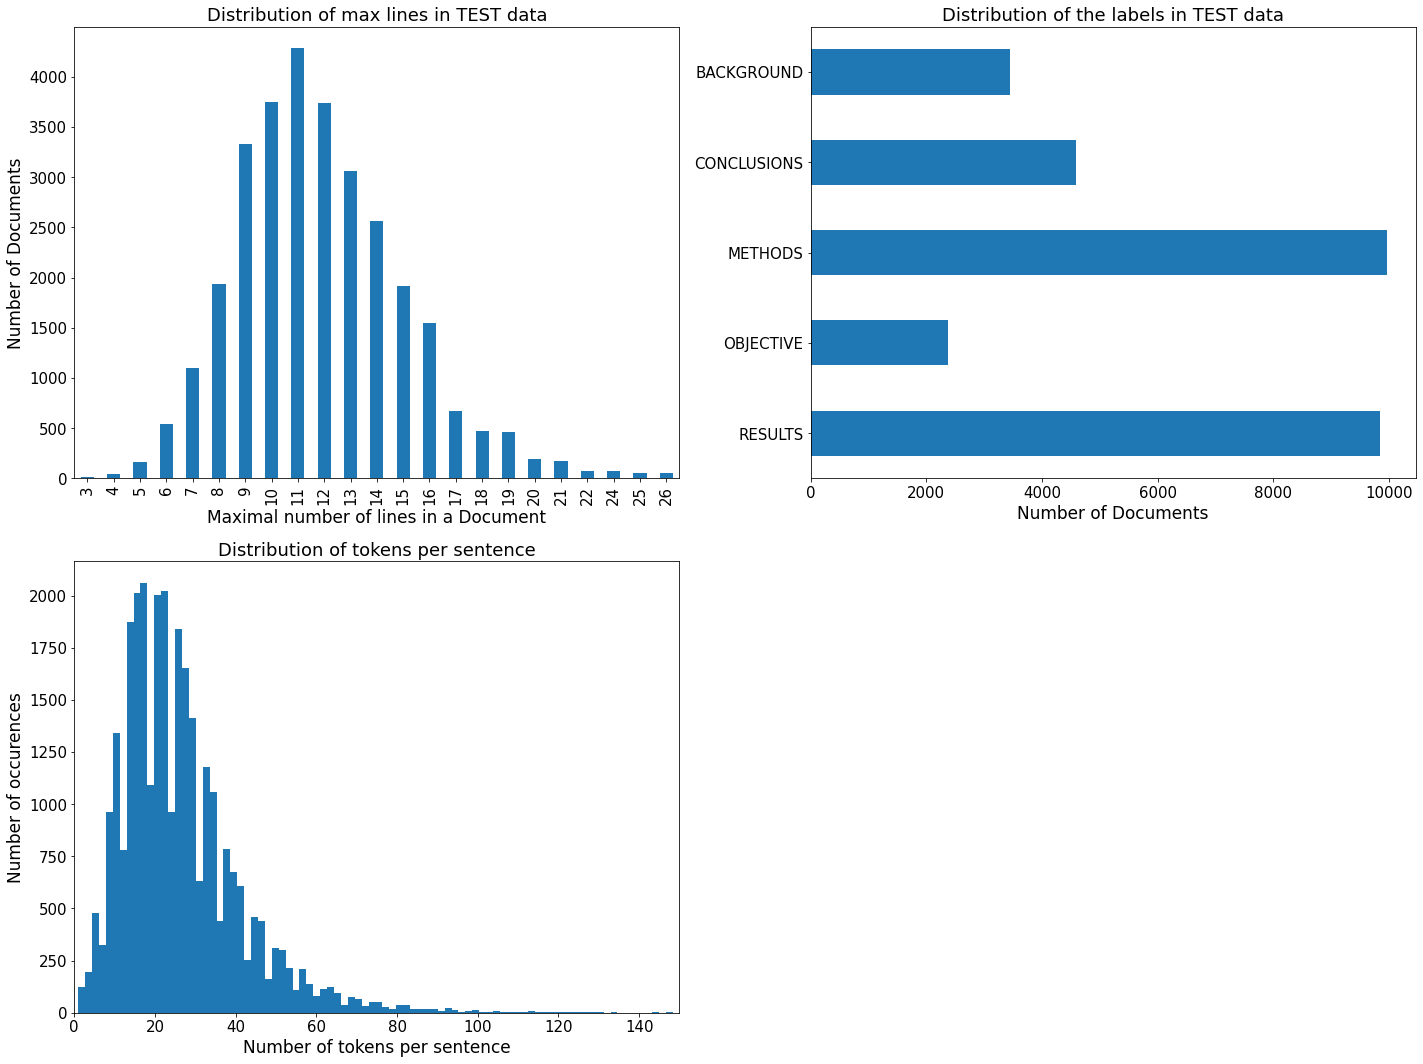

In [28]:
plot_distribution(df_val,'TEST')

## Numerical encoding of labels

### One Hot Encoding

In [29]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [30]:
df_train.head()

,line_number,max_line,sentences,target
0,0,11,to investigate the efficacy of @ weeks of dail...,OBJECTIVE
1,1,11,a total of @ patients with primary knee oa wer...,METHODS
2,2,11,outcome measures included pain reduction and i...,METHODS
3,3,11,pain was assessed using the visual analog pain...,METHODS
4,4,11,secondary outcome measures included the wester...,METHODS


In [31]:
# one hot encoder
onehot_encoder = OneHotEncoder(sparse=False) # use sparse to be able to turn it into a tf tensor
train_labels_one_hot = onehot_encoder.fit_transform(df_train['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = onehot_encoder.transform(df_val['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = onehot_encoder.transform(df_test['target'].to_numpy().reshape(-1,1))

In [32]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
# or use pandas get_dummies method
# pd.get_dummies(df_train.target).values

### Label Encode Labels

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# label encoder
label_encoder = LabelEncoder()
train_labels_labelencoded = label_encoder.fit_transform(df_train['target'].to_numpy())
val_labels_labelencoded = label_encoder.transform(df_val['target'].to_numpy())
test_labels_labelencoded = label_encoder.transform(df_test['target'].to_numpy())

In [36]:
train_labels_labelencoded

array([3, 2, 2, ..., 4, 1, 1])

In [37]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [38]:
# define the data that will be passed to the model
train_sentences = df_train.sentences.values
val_sentences = df_val.sentences.values
test_sentences = df_test.sentences.values

# Model 0 - creating a baseline model

## build & fit a naive bayes baseline model

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [40]:
# create the model Pipeline
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

In [41]:
# fit the model
# MulinomialNB requires label encoded labels, so we have to use train_labels_labelencoded
model_0.fit(X=train_sentences,
            y=train_labels_labelencoded
)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Evaluate the model

In [42]:
# evaluate the model
model_0.score(val_sentences,val_labels_labelencoded)

0.7218323844829869

In [43]:
# make predictions using basline model
model_0_preds = model_0.predict(val_sentences)

In [44]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [45]:
model_0_results = calculate_results(val_labels_labelencoded,model_0_preds)
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Model 1 - Conv1D Model with Embedding

## Build the model

In [46]:
# make the neccessary imports
from tensorflow.keras import layers
from helper_functions import create_tensorboard_callback

### Create TextVectorization Layer

In [47]:
import numpy as np

In [48]:
max_tokens = 68000 # got that value from the paper

In [49]:
# calculate mean token length in each sentence
mean_token_length = int(np.mean([len(x) for x in df_train.sentences.str.split()]))
q90 = int(np.quantile([len(x) for x in df_train.sentences.str.split()],0.9))

In [50]:
mean_token_length, q90

(26, 45)

In [51]:
# create the text vectorization layer
text_vectorizer = layers.TextVectorization(
    max_tokens = max_tokens, # maximal number of different words in the vocab
    standardize = 'lower_and_strip_punctuation',
    split = 'whitespace',
    output_sequence_length = q90
)

Metal device set to: Apple M1


2021-11-24 12:34:54.693289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-24 12:34:54.693374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [52]:
# adapt the vectorizer to the train sentences
text_vectorizer.adapt(train_sentences)

2021-11-24 12:34:54.731819: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-24 12:34:54.731983: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-24 12:34:54.759842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [53]:
vocab_tv = text_vectorizer.get_vocabulary()
print("number of unique words in the vocabulary: %d"%len(vocab_tv))
print(f"First ten words in the vocab are {vocab_tv[:10]}")
print(f"Last ten words in the vocab are {vocab_tv[-10:]}")

number of unique words in the vocabulary: 64841
First ten words in the vocab are ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
Last ten words in the vocab are ['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


### Create Embedding Layer

In [54]:
embedding = layers.Embedding(
    input_dim = len(vocab_tv),
    output_dim = 128, 
    mask_zero=True,
    input_length=mean_token_length
)

In [55]:
embedding(text_vectorizer(['This is a sample sentence we want to classify']))

<tf.Tensor: shape=(1, 45, 128), dtype=float32, numpy=
array([[[ 0.04848984, -0.02641311, -0.00251706, ..., -0.02433475,
          0.0469701 , -0.04174625],
        [-0.0301468 ,  0.01664257,  0.00698966, ...,  0.03302902,
          0.02761017,  0.04779518],
        [-0.01707444,  0.00020711, -0.01951962, ..., -0.02331528,
         -0.01623024, -0.04338765],
        ...,
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.03387885,
          0.00563985,  0.02436881],
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.03387885,
          0.00563985,  0.02436881],
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.03387885,
          0.00563985,  0.02436881]]], dtype=float32)>

### Create a TF Dataset for better performance

In [56]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [57]:
# turn our datasets into prefetched datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Build & Fit the model 1

In [58]:
# define the input layer
inputs = layers.Input(shape=(1,),dtype=tf.string,name='input_layer')

# hand inputs to vectorizer
x = text_vectorizer(inputs)

# create the embedding
x = embedding(x)

# pass it to the conv1d layer
x = layers.Conv1D(64,3,activation='relu')(x)

# define max pooling layer
x = layers.GlobalMaxPooling1D(name='max_pool')(x)

# define the outputs => one hot encoded
outputs = layers.Dense(num_classes,activation='softmax',name='output_layer')(x)

# create the model
model_1 = tf.keras.Model(inputs,outputs,name='model_1')

In [59]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 45)                0         
_________________________________________________________________
embedding (Embedding)        (None, 45, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 43, 64)            24640     
_________________________________________________________________
max_pool (GlobalMaxPooling1D (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 8,324,613
Trainable params: 8,324,613
Non-trainable params: 0
_________________________________________________

In [60]:
# compile the model
model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [61]:
%%time
model_1_history = model_1.fit(
    train_dataset,
    steps_per_epoch=int(0.1*len(train_dataset)),
    epochs=1,
    validation_data=(val_sentences,val_labels_one_hot),
    validation_steps=int(0.1*len(val_dataset)),
    callbacks=[create_tensorboard_callback('Tensorboard','model_1')]
)

Saving TensorBoard log files to: Tensorboard/model_1/20211124-123457


2021-11-24 12:34:57.310001: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-24 12:34:57.310008: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-24 12:34:57.310044: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-24 12:34:57.460394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  5/562 [..............................] - ETA: 22s - loss: 1.5973 - accuracy: 0.3187

2021-11-24 12:34:57.603251: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-24 12:34:57.603263: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-24 12:34:57.643551: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-24 12:34:57.644226: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-24 12:34:57.645334: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: Tensorboard/model_1/20211124-123457/train/plugins/profile/2021_11_24_12_34_57

2021-11-24 12:34:57.645786: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to Tensorboard/model_1/20211124-123457/train/plugins/profile/2021_11_24_12_34_57/MacBook-Air-von-Johannes.local.trace.json.gz
2021-11-24 12:34:57.647060: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating director

561/562 [============================>.] - ETA: 0s - loss: 0.8640 - accuracy: 0.6774

2021-11-24 12:35:17.481589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


562/562 [==============================] - 21s 37ms/step - loss: 0.8632 - accuracy: 0.6777 - val_loss: 0.6206 - val_accuracy: 0.7735
CPU times: user 8.25 s, sys: 5.06 s, total: 13.3 s
Wall time: 21.1 s


## Evaluate the model

In [62]:
model_1.evaluate(val_dataset)

 13/945 [..............................] - ETA: 7s - loss: 0.6872 - accuracy: 0.7284

2021-11-24 12:35:18.474556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


945/945 [==============================] - 7s 7ms/step - loss: 0.6206 - accuracy: 0.7735


[0.620641827583313, 0.7735005617141724]

In [63]:
# get prediction
model_1_preds = model_1.predict(val_dataset)

2021-11-24 12:35:25.478479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [64]:
# convert to classes
model_1_preds_classes = np.argmax(model_1_preds,axis=1)

In [65]:
model_1_results = calculate_results(val_labels_labelencoded,model_1_preds_classes)
model_1_results

{'accuracy': 77.35005957897523,
 'precision': 0.7752719358558394,
 'recall': 0.7735005957897524,
 'f1': 0.7708692598111563}

# Model 2 - pretrained TF feature extractor layer

## Lets get the embedding layer from tf-hub

In [66]:
#!conda install -c conda-forge tensorflow-estimator

In [67]:
import tensorflow_hub as hub

In [68]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

2021-11-24 12:35:30.071934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-24 12:35:30.238866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [69]:
embeddings

<tf.Tensor: shape=(2, 250), dtype=float32, numpy=
array([[-5.14805540e-02, -1.92053974e-01,  4.53008525e-02,
        -9.96370390e-02,  5.38923480e-02,  8.34979564e-02,
         7.27996677e-02, -1.27169073e-01,  6.24356270e-02,
         9.81895104e-02, -5.33969402e-02,  1.61190659e-01,
        -1.36027522e-02, -2.72708107e-03,  1.71537384e-01,
         1.24906197e-01,  1.15381563e-02, -2.77321301e-02,
         6.66442439e-02, -1.28565924e-02,  3.95655632e-02,
         1.61706526e-02,  3.44905234e-03, -3.30653414e-02,
         1.13467865e-01, -3.23929265e-02,  6.64588250e-03,
         5.34387156e-02,  1.19479060e-01,  4.63577174e-02,
         8.30192715e-02, -5.91111630e-02,  8.59290361e-02,
        -1.01532824e-01,  7.54378317e-03,  4.15412569e-03,
         5.89248538e-03, -2.51556151e-02,  1.13079183e-01,
        -4.36960533e-02, -1.68391705e-01,  2.92641334e-02,
        -1.40178025e-01, -8.40619281e-02,  1.48394153e-01,
         9.07467008e-02, -5.67608029e-02, -1.04004763e-01,
      

In [70]:
# create a keras layer of the 
emb_hub_layer = hub.KerasLayer(embed,
                           input_shape=[], dtype=tf.string, trainable=False)

## Build and fit the model

In [71]:
# define the input layer
inputs = layers.Input(shape=(),dtype=tf.string,name='input_layer')

# hand the inputs to the keras pretrained embedding layer
x = emb_hub_layer(inputs)

# feed to a Dense layer
x = layers.Dense(128,activation='relu',name='dense1')(x)

# feed to a Dense layer
x = layers.Dense(64,activation='relu',name='dense2')(x)

# define the outputs => one hot encoded
outputs = layers.Dense(num_classes,activation='softmax',name='output_layer')(x)

# create the model
model_2 = tf.keras.Model(inputs,outputs,name='model_2')

In [72]:
# compile the model
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [73]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 250)               252343750 
_________________________________________________________________
dense1 (Dense)               (None, 128)               32128     
_________________________________________________________________
dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 252,384,459
Trainable params: 40,709
Non-trainable params: 252,343,750
_________________________________________________________________


In [74]:
%%time
'''model_2_history = model_2.fit(
    train_dataset,
    steps_per_epoch=int(0.1*len(train_dataset)),
    epochs=5,
    validation_data=(val_sentences,val_labels_one_hot),
    validation_steps=int(0.1*len(val_dataset)),
    callbacks=[create_tensorboard_callback('Tensorboard','model_2')]
)'''

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


"model_2_history = model_2.fit(\n    train_dataset,\n    steps_per_epoch=int(0.1*len(train_dataset)),\n    epochs=5,\n    validation_data=(val_sentences,val_labels_one_hot),\n    validation_steps=int(0.1*len(val_dataset)),\n    callbacks=[create_tensorboard_callback('Tensorboard','model_2')]\n)"

## Evaluate the model 2

In [75]:
model_2.evaluate(val_dataset)

 15/945 [..............................] - ETA: 7s - loss: 1.6325 - accuracy: 0.1083

2021-11-24 12:35:30.601749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


945/945 [==============================] - 6s 6ms/step - loss: 1.6324 - accuracy: 0.1138


[1.632442593574524, 0.11379583925008774]

In [76]:
# get prediction
model_2_preds = model_2.predict(val_dataset)

2021-11-24 12:35:36.742019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [77]:
# convert to classes
model_2_preds_classes = np.argmax(model_2_preds,axis=1)

In [78]:
model_2_results = calculate_results(val_labels_labelencoded,model_2_preds_classes)
model_2_results

{'accuracy': 11.379584271150536,
 'precision': 0.2529414200320633,
 'recall': 0.11379584271150536,
 'f1': 0.09216813841856604}

In [79]:
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Model 3 - Conv1D for Character Embeddings

## Create a character level tokenizer

In [80]:
# make function to split text (e.g. string) into chars
def split_chars(text):
    return " ".join(list(text))

split_chars('This is a test')

'T h i s   i s   a   t e s t'

In [81]:
# split data into chars
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [82]:
# print example
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [83]:
# what is the average character length in a sentence?
char_lens = [len(ex) for ex in train_sentences]
avg_char_len = int(np.mean(char_lens))
q95_char_len = int(np.quantile(char_lens,0.95))

In [84]:
q95_char_len

290

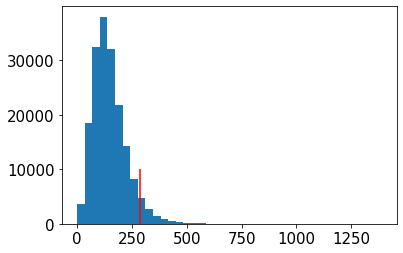

In [85]:
# check distribution
plt.hist(char_lens,bins=40)
plt.vlines(q95_char_len,0,10000,color='red')
plt.show()

In [86]:
# get all keyboard characters for the max_tokens var in text_vectorizer
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet, len(alphabet)

('abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', 68)

In [87]:
NUM_CHAR_TOKENS = len(alphabet) + 2 # add two for space and OOV

In [88]:
# define the char vectorizer
char_vectorizer = layers.TextVectorization(
    max_tokens = NUM_CHAR_TOKENS,
    standardize = 'lower_and_strip_punctuation',
    split = 'whitespace',
    output_sequence_length = q95_char_len
)

In [89]:
# adapt the vectorizer
char_vectorizer.adapt(train_chars)

2021-11-24 12:35:40.656792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [90]:
len_char_vocab = len(char_vectorizer.get_vocabulary())

In [91]:
# get the vocabulary
char_vectorizer.get_vocabulary()

['',
 '[UNK]',
 'e',
 't',
 'i',
 'a',
 'n',
 'o',
 'r',
 's',
 'd',
 'c',
 'l',
 'h',
 'p',
 'm',
 'u',
 'f',
 'g',
 'y',
 'w',
 'v',
 'b',
 'k',
 'x',
 'z',
 'q',
 'j']

In [92]:
import random

In [93]:
char_vectorizer(random.choice(train_chars))

<tf.Tensor: shape=(290,), dtype=int64, numpy=
array([15, 16, 12,  3,  4, 21,  5,  8,  4,  5, 22, 12,  2, 15,  7, 10,  2,
       12,  4,  6, 18, 20,  5,  9, 16,  9,  2, 10,  3,  7,  5,  9,  9,  2,
        9,  9,  3, 13,  2,  2, 17, 17,  2, 11,  3,  7, 17, 11,  7, 12, 12,
        5,  3,  2,  8,  5, 12,  9,  3,  5,  3, 16,  9,  5,  6, 10,  3,  8,
        2,  5,  3, 15,  2,  6,  3,  3, 19, 14,  2,  7,  6, 11, 12,  4,  6,
        4, 11,  5, 12,  7, 16,  3, 11,  7, 15,  2, 22, 19, 15,  7, 10,  4,
       17,  4,  2, 10,  8,  5,  6, 23,  4,  6,  9, 11,  5, 12,  2, 15,  8,
        9, 15,  8,  9,  5,  6, 10,  3, 13,  2,  7,  8, 10,  4,  6,  5, 12,
       15,  8,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

## Create a char level embedding

In [94]:
char_embed = layers.Embedding(
    input_dim = len_char_vocab,
    output_dim = 25, #from papaer
    mask_zero=True
)

In [95]:
char_embed(char_vectorizer([random.choice(train_chars)]))

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[-0.00703323, -0.01321829,  0.00135789, ...,  0.01969553,
         -0.04036635, -0.02171596],
        [ 0.03363099,  0.03370085, -0.00262179, ...,  0.01619575,
         -0.02147888,  0.0047858 ],
        [ 0.03387885,  0.00563985,  0.02436881, ..., -0.03067978,
         -0.00077651,  0.01864156],
        ...,
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.0076903 ,
         -0.04405048,  0.01774101],
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.0076903 ,
         -0.04405048,  0.01774101],
        [-0.0071764 ,  0.02066778, -0.02866557, ...,  0.0076903 ,
         -0.04405048,  0.01774101]]], dtype=float32)>

## Build the Character Embedding Model 3 with a Conv1D layer

In [96]:
# define the inputs
inputs = layers.Input(shape=(1,),dtype=tf.string,name='input_layer')

# hand the input string to the char vectorizer
x = char_vectorizer(inputs)

# pass the vectorized inputs to the char embedding layer
x = char_embed(x)

# pass the output of the embedding to the conv1d layer
x = layers.Conv1D(64,3,activation='relu',name='conv1d_layer')(x)

# globalaveragepooling1d
x = layers.GlobalMaxPooling1D(name='avg_pooling')(x)

# create the output layer
outputs = layers.Dense(num_classes,activation='softmax',name='output_layer')(x)

# create the output layer
model_3 = tf.keras.Model(inputs,outputs,name='model_3')

In [97]:
# get a summary
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 290)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 290, 25)           700       
_________________________________________________________________
conv1d_layer (Conv1D)        (None, 288, 64)           4864      
_________________________________________________________________
avg_pooling (GlobalMaxPoolin (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 5)                 325       
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________

In [98]:
# compile the model
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [99]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot))
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot))

In [100]:
# turn our datasets into prefetched datasets
train_char_dataset = train_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = val_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = test_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [101]:
%%time
model_3_history = model_3.fit(
    train_char_dataset,
    steps_per_epoch=int(0.1*len(train_char_dataset)),
    epochs=3,
    validation_data=val_char_dataset,
    validation_steps=int(0.1*len(val_char_dataset))
)

Epoch 1/3
  4/562 [..............................] - ETA: 12s - loss: 1.5966 - accuracy: 0.2891 

2021-11-24 12:35:43.467044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


560/562 [============================>.] - ETA: 0s - loss: 1.3386 - accuracy: 0.4589

2021-11-24 12:35:54.847435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


562/562 [==============================] - 12s 21ms/step - loss: 1.3370 - accuracy: 0.4597 - val_loss: 1.1415 - val_accuracy: 0.5419
Epoch 2/3
562/562 [==============================] - 11s 20ms/step - loss: 1.1002 - accuracy: 0.5510 - val_loss: 1.0344 - val_accuracy: 0.5894
Epoch 3/3
562/562 [==============================] - 12s 22ms/step - loss: 1.0279 - accuracy: 0.5887 - val_loss: 0.9710 - val_accuracy: 0.6107
CPU times: user 20.5 s, sys: 10.6 s, total: 31.1 s
Wall time: 35.4 s


## Evaluate the model

In [102]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.9894 - accuracy: 0.6079


[0.9893648028373718, 0.6079041361808777]

In [103]:
model_3_preds = model_3.predict(val_char_dataset)
model_3_preds

2021-11-24 12:36:25.308061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.16599467, 0.27252522, 0.20759068, 0.19078448, 0.16310495],
       [0.25547928, 0.40855977, 0.10241961, 0.15999596, 0.07354545],
       [0.11659583, 0.3702069 , 0.15571427, 0.2182858 , 0.13919729],
       ...,
       [0.04107411, 0.0934499 , 0.24775557, 0.0879386 , 0.52978176],
       [0.03392501, 0.2553882 , 0.40761217, 0.03865816, 0.2644164 ],
       [0.34054157, 0.42945004, 0.09534112, 0.10505561, 0.02961169]],
      dtype=float32)

In [104]:
model_3_results = calculate_results(val_labels_labelencoded,np.argmax(model_3_preds,axis=1))
model_3_results

{'accuracy': 60.79041440487224,
 'precision': 0.5992959961385964,
 'recall': 0.6079041440487224,
 'f1': 0.5923150370241353}

# Model 4 - Multi Input Model

## Create token model

In [105]:
# setup the token inputs
token_inputs = layers.Input(shape=(),dtype=tf.string,name='token_input_layer')
token_embeddings = emb_hub_layer(token_inputs)
token_output = layers.Dense(128,activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_output,name='token_model')

## Create char model

In [106]:
char_inputs = layers.Input(shape=(1,),dtype=tf.string,name='char_input_layer')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(char_inputs,char_bi_lstm,name='char_model')

## Concatenate the layers

In [107]:
token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output,char_model.output])

## Create Output Layers and add Dropout

In [108]:
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128,activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
outputs = layers.Dense(num_classes,activation='softmax',name='output_layer')(final_dropout)

## Combining everything for model 4

In [109]:
model_4 = tf.keras.Model([token_model.input,char_model.input],outputs,name='model_4')

In [110]:
model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input_layer (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input_layer (InputLayer)  [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 290)          0           char_input_layer[0][0]           
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 250)          252343750   token_input_layer[0][0]          
____________________________________________________________________________________________

## Plot the summary of our model

In [111]:
from tensorflow.keras.utils import plot_model

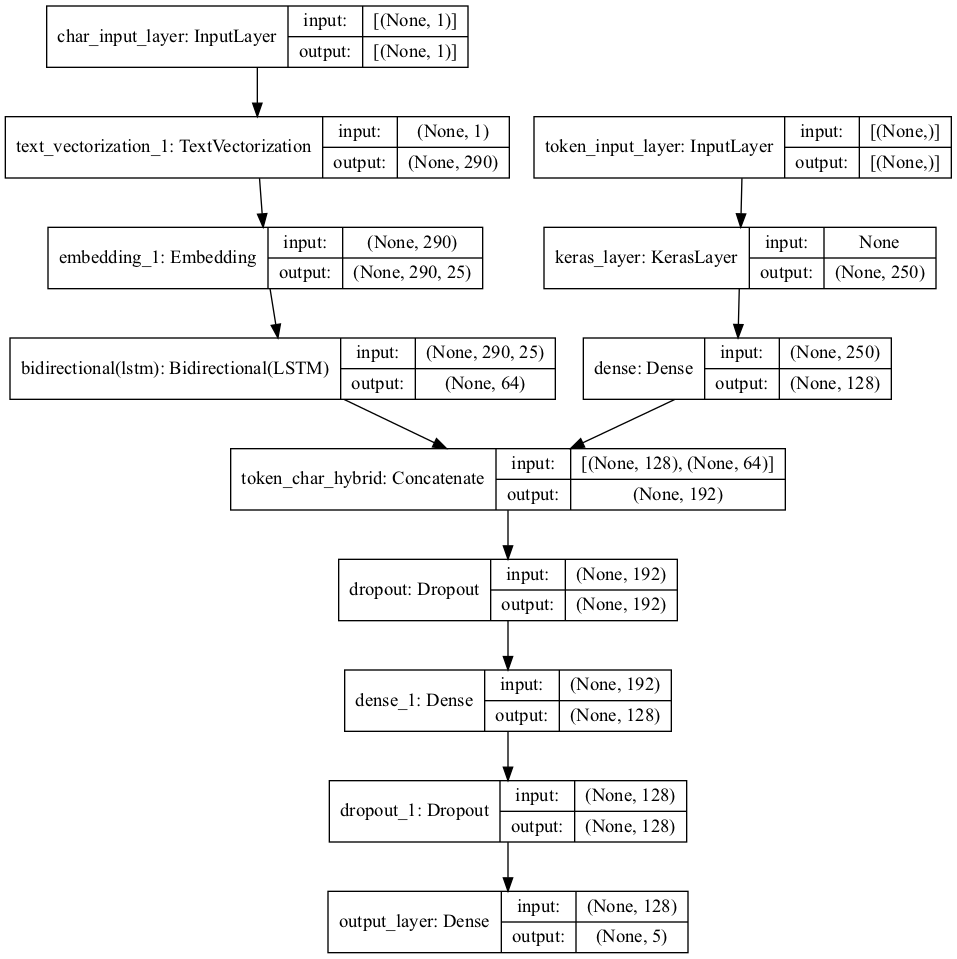

In [112]:
plot_model(model_4, show_shapes=True)

## Compile the model

In [113]:
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

## Prepare the data with tf.data API

In [114]:
train_sentences[:10]

array(['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
       'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
       'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
       'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
       'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
       'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) we

In [115]:
# prepare train data
train_tc_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_tc_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_tc_dataset = tf.data.Dataset.zip((train_tc_data,train_tc_labels))

# prepare val data
val_tc_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_tc_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_tc_dataset = tf.data.Dataset.zip((val_tc_data,val_tc_labels))

In [116]:
# turn our datasets into prefetched datasets
train_tc_dataset = train_tc_dataset.batch(128).prefetch(tf.data.AUTOTUNE)
val_tc_dataset = val_tc_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

In [117]:
train_tc_dataset

<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>

## Fit and Evaluate the Model

In [118]:
with tf.device("/cpu:0"):# fit the model
    model_4_history = model_4.fit(
        train_tc_dataset,
        steps_per_epoch=int(0.1*len(train_tc_dataset)),
        epochs=3,
        validation_data = val_tc_dataset,
        validation_steps = int(0.1*len(val_tc_dataset)),
        verbose=1
    )

Epoch 1/3


2021-11-24 12:36:31.997680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - ETA: 0s - loss: 1.1943 - accuracy: 0.5047

2021-11-24 12:36:49.990848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 21s 133ms/step - loss: 1.1943 - accuracy: 0.5047 - val_loss: 0.9287 - val_accuracy: 0.6410
Epoch 2/3
140/140 [==============================] - 19s 135ms/step - loss: 0.9318 - accuracy: 0.6282 - val_loss: 0.8420 - val_accuracy: 0.6776
Epoch 3/3
140/140 [==============================] - 19s 136ms/step - loss: 0.8674 - accuracy: 0.6632 - val_loss: 0.7776 - val_accuracy: 0.6997


In [119]:
with tf.device("/cpu:0"):# fit the model
    model_4_preds = model_4.predict(val_tc_dataset)

2021-11-24 12:37:29.356965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [120]:
model_4_preds_classes = np.argmax(model_4_preds,axis=1)

In [124]:
model_4_results = calculate_results(val_labels_labelencoded,model_4_preds_classes)
model_4_results

{'accuracy': 69.77028995101284,
 'precision': 0.7065205043704781,
 'recall': 0.6977028995101284,
 'f1': 0.6868376822885847}

In [125]:
model_1_results

{'accuracy': 77.35005957897523,
 'precision': 0.7752719358558394,
 'recall': 0.7735005957897524,
 'f1': 0.7708692598111563}

# Model 5 - Label Sequence Optimization Layer

## Create positional embedding

### For line_numbers

In [126]:
df_train.head()

,line_number,max_line,sentences,target
0,0,11,to investigate the efficacy of @ weeks of dail...,OBJECTIVE
1,1,11,a total of @ patients with primary knee oa wer...,METHODS
2,2,11,outcome measures included pain reduction and i...,METHODS
3,3,11,pain was assessed using the visual analog pain...,METHODS
4,4,11,secondary outcome measures included the wester...,METHODS


<AxesSubplot:>

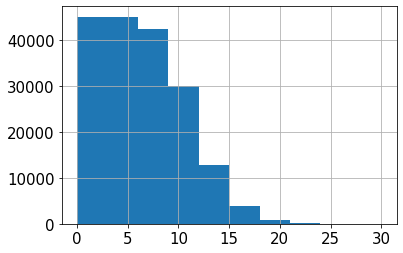

In [136]:
df_train.line_number.hist()

In [130]:
# one hot encode our numbers with a max depth of 15, e.g. max number of lines in abstract is 15
train_line_numbers_one_hot = tf.one_hot(df_train.line_number.to_numpy(),depth=15)
val_line_numbers_one_hot = tf.one_hot(df_val.line_number.to_numpy(),depth=15)
test_line_numbers_one_hot = tf.one_hot(df_test.line_number.to_numpy(),depth=15)

In [149]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot.ndim

(TensorShape([180040, 15]), 2)

In [129]:
train_line_numbers_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

### For max_lines

<AxesSubplot:>

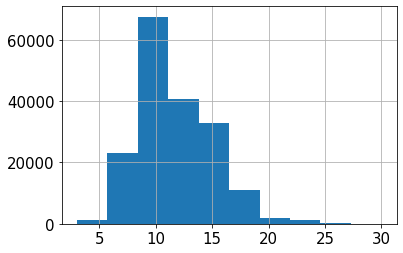

In [140]:
# plot distribution
df_train.max_line.hist()

In [141]:
# check threshold which coveres 98%
np.quantile(df_train.max_line,0.98)

20.0

In [142]:
# one hot encode
train_max_line_one_hot = tf.one_hot(df_train.max_line.to_numpy(),depth=20)
val_max_line_one_hot = tf.one_hot(df_val.max_line.to_numpy(),depth=20)
test_max_line_one_hot = tf.one_hot(df_test.max_line.to_numpy(),depth=20)

In [144]:
train_max_line_one_hot[10:15]

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

## Build the tribrid embedding model

1. Build token embedding model
2. Build character embedding model
3. Build line_number embedding model
4. Build max_line number embedding model
5. Concatenate 1&2 with tf.keras.layers.Concatenate
6. Combine 3&4&5 as above
7. create an output layer
8. Build a model with 1,2,3,4 as inputs and output layer

### Build token embedding model

In [145]:
# setup the token inputs
token_inputs = layers.Input(shape=(),dtype=tf.string,name='token_input_layer')
token_embeddings = emb_hub_layer(token_inputs)
token_output = layers.Dense(128,activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_output,name='token_model')

### Build the char embedding model

In [146]:
char_inputs = layers.Input(shape=(1,),dtype=tf.string,name='char_input_layer')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(char_inputs,char_bi_lstm,name='char_model')

### Build the line_number model

In [211]:
ln_input = layers.Input(shape=[15],dtype=tf.float32,name='line_number_input_layer')
ln_output = layers.Dense(32,activation='relu',name='line_number_output_layer')(ln_input)
ln_model = tf.keras.Model(ln_input,ln_output,name='line_number_model')

### Build a max_line model

In [212]:
ml_input = layers.Input(shape=[20],dtype=tf.float32,name='max_line_input_layer')
ml_output = layers.Dense(32,activation='relu',name='max_line_output_layer')(ml_input)
ml_model = tf.keras.Model(ml_input,ml_output,name='max_line_model')

### Concatenate 1 & 2

In [213]:
concat_layer1 = layers.Concatenate(name='concat_layer1')([token_model.output,char_model.output])

### Concat 3&4&5

In [214]:
concat_layer2 = layers.Concatenate(name='concat_layer2')([concat_layer1,ln_model.output,ml_model.output])

### create output layer

In [215]:
dropout_layer1 = layers.Dropout(0.5)(concat_layer2)
layer_dense = layers.Dense(128,activation='relu')(dropout_layer1)
final_dropout = layers.Dropout(0.5)(layer_dense)
outputs = layers.Dense(num_classes,activation='softmax')(final_dropout)

### Create the model

In [216]:
model_5 = tf.keras.Model([token_model.input,char_model.input,ln_model.input,ml_model.input],outputs,name='model_5')

### Visualize the model

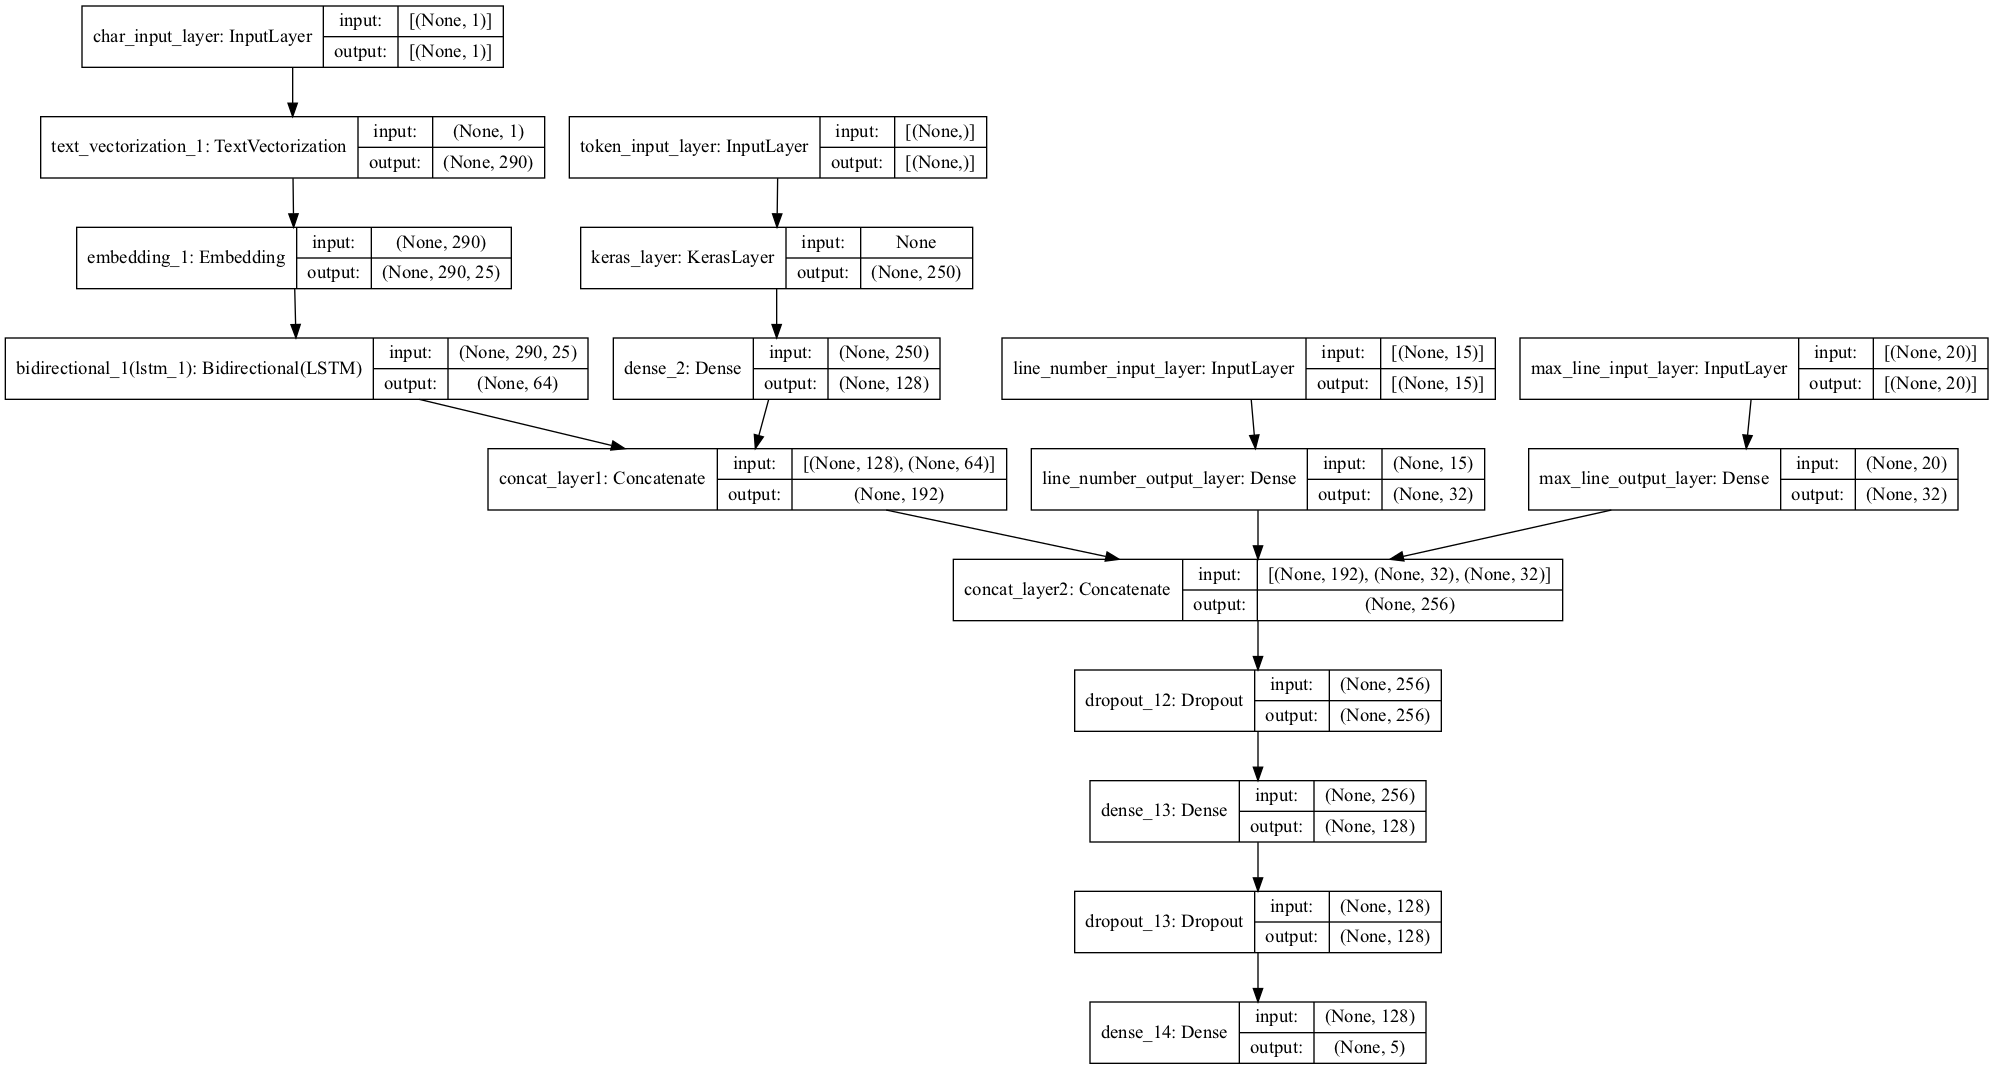

In [217]:
plot_model(model_5,show_shapes=True)

In [218]:
model_5.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input_layer (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input_layer (InputLayer)  [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 290)          0           char_input_layer[0][0]           
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 250)          252343750   token_input_layer[0][0]          
____________________________________________________________________________________________

### compile the model

In [219]:
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    metrics='accuracy'
)

## create the dataset

In [220]:
# prepare train data
train_tclnml_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars,train_line_numbers_one_hot,train_max_line_one_hot))
train_tclnml_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_tclnml_dataset = tf.data.Dataset.zip((train_tclnml_data,train_tclnml_labels))

# prepare val data
val_tclnml_data = tf.data.Dataset.from_tensor_slices((val_sentences,val_chars,val_line_numbers_one_hot,val_max_line_one_hot))
val_tclnml_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_tclnml_dataset = tf.data.Dataset.zip((val_tclnml_data,val_tclnml_labels))

In [221]:
# turn our datasets into prefetched datasets
train_tclnml_dataset = train_tclnml_dataset.batch(128).prefetch(tf.data.AUTOTUNE)
val_tclnml_dataset = val_tclnml_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

## Fit the model

In [222]:
with tf.device("/cpu:0"):# fit the model
    model_5_history = model_5.fit(
        train_tclnml_dataset,
        steps_per_epoch=int(0.1*len(train_tclnml_dataset)),
        epochs=5,
        validation_data = val_tclnml_dataset,
        validation_steps = int(0.1*len(val_tclnml_dataset)),
        verbose=1
    )

Epoch 1/5


2021-11-24 14:36:06.626210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - ETA: 0s - loss: 0.9232 - accuracy: 0.6412

2021-11-24 14:36:24.853079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 21s 133ms/step - loss: 0.9232 - accuracy: 0.6412 - val_loss: 0.6071 - val_accuracy: 0.7884
Epoch 2/5
140/140 [==============================] - 17s 124ms/step - loss: 0.6332 - accuracy: 0.7645 - val_loss: 0.5086 - val_accuracy: 0.8091
Epoch 3/5
140/140 [==============================] - 17s 124ms/step - loss: 0.5781 - accuracy: 0.7822 - val_loss: 0.4871 - val_accuracy: 0.8101
Epoch 4/5
140/140 [==============================] - 17s 125ms/step - loss: 0.5551 - accuracy: 0.7872 - val_loss: 0.4683 - val_accuracy: 0.8135
Epoch 5/5
140/140 [==============================] - 18s 129ms/step - loss: 0.5433 - accuracy: 0.7909 - val_loss: 0.4461 - val_accuracy: 0.8244


## Evaluate the model

In [223]:
with tf.device("/cpu:0"):# fit the model
    model_5_preds = model_5.predict(val_tclnml_dataset)

2021-11-24 14:37:41.658688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [224]:
model_5_preds_classes = np.argmax(model_5_preds,axis=1)

In [225]:
model_5_results = calculate_results(val_labels_labelencoded,model_5_preds_classes)
model_5_results

{'accuracy': 82.78829604130809,
 'precision': 0.8291194148887439,
 'recall': 0.8278829604130808,
 'f1': 0.8260516501660519}

In [304]:
model_4_results

{'accuracy': 69.77028995101284,
 'precision': 0.7065205043704781,
 'recall': 0.6977028995101284,
 'f1': 0.6868376822885847}

In [226]:
model_1_results

{'accuracy': 77.35005957897523,
 'precision': 0.7752719358558394,
 'recall': 0.7735005957897524,
 'f1': 0.7708692598111563}

# Understanding CategoricalCrossentropy

## single target vector

In [299]:
y_true = [0, 1, 0]
y_pred = [0.05, 0.9, 0.05]
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.3)
cce(y_true, y_pred).numpy()

0.10536057

In [294]:
-(0.3/3*np.log(0.05)+(0.7+0.3/3)*np.log(0.9)+(0.3/3)*np.log(0.05))

0.6834348672370592

## 2 target vectors -> averaged output

In [300]:
y_true = [0, 1, 0]
y_pred = [0.05, 0.9, 0.05]
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

0.10536057

In [302]:
# batch of size 2
y_true = [[1, 0, 0]]
y_pred = [[0.05, 0.9, 0.05]]
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

2.9957323

In [301]:
# batch of size 2
y_true = [[0, 1, 0],[1, 0, 0]]
y_pred = [[0.05, 0.9, 0.05],[0.05, 0.9, 0.05]]
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.5505464

In [303]:
(2.9957323 + 0.10536057) / 2

1.550546435